In [1]:
setwd('/home/thlamp/tcga/data')
library(ggplot2)
library(MOFA2)


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




# Load trained model

In [10]:
# model <- load_model("/home/thlamp/tcga/data/model.hdf5")
model <- load_model("/home/thlamp/tcga/data/mRNA_miRNA_model.hdf5")

In [4]:
head(samples_metadata(model), 1)

group  sample          
1 group1 TCGA-2V-A95S-01A

In [5]:
samples_metadata <- readRDS("model_metadata.rds")
samples_metadata(model) <- samples_metadata
head(samples_metadata(model), 3)

ERROR: Error in `samples_metadata<-`(`*tmp*`, value = structure(list(group = structure(c(1L, : Groups names in the model (see `groups(MOFAobject)`) and in the metadata do not match


# MOFA results for state

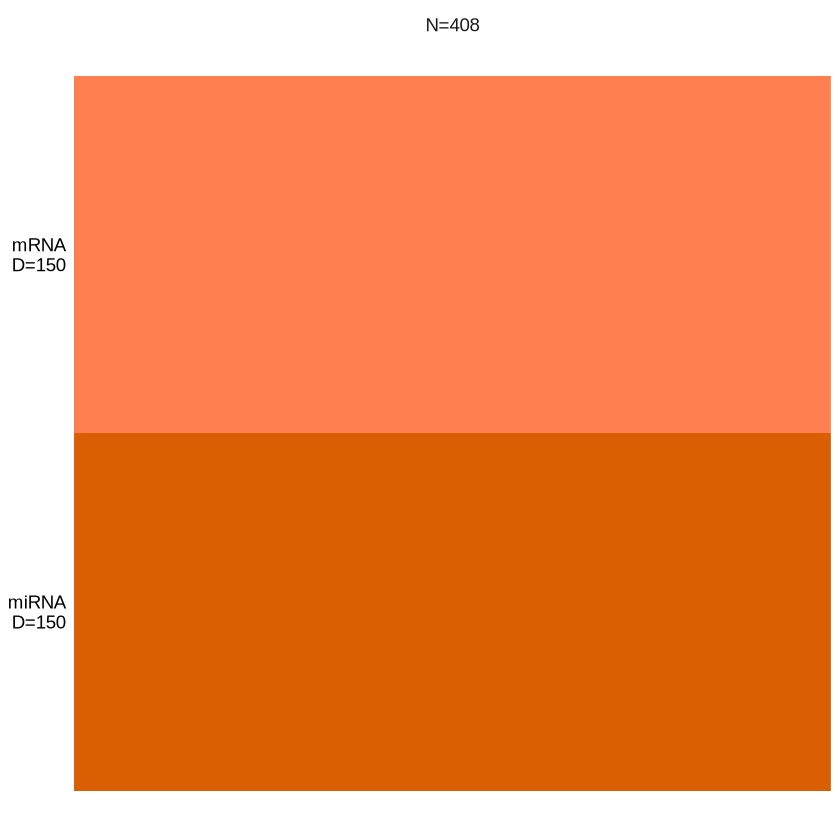

In [ ]:
plot_data_overview(model) 

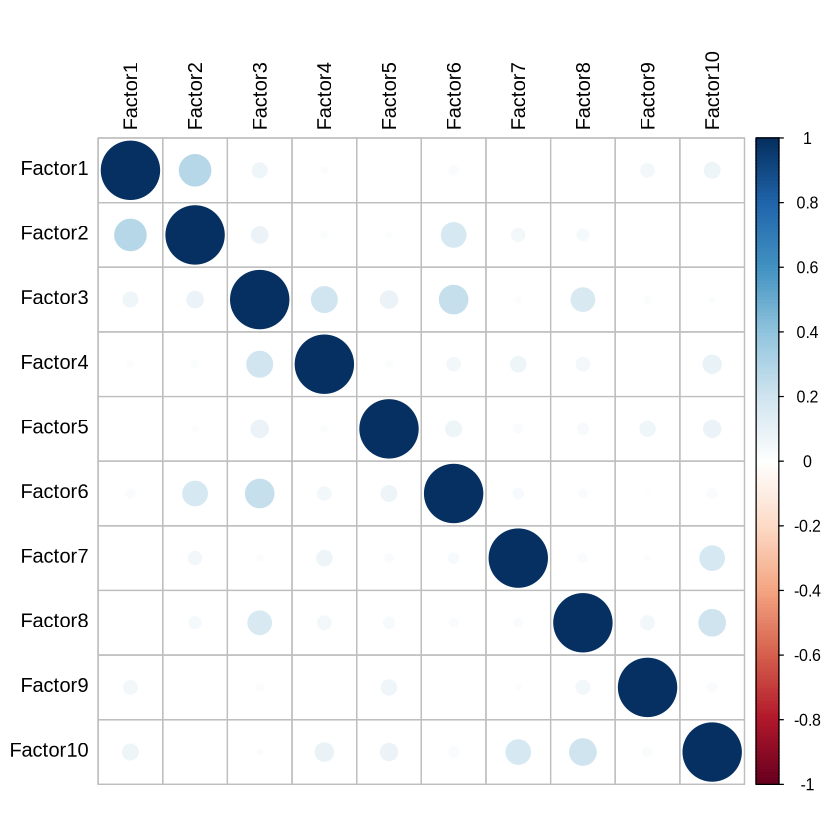

In [12]:
plot_factor_cor(model)

In [13]:
# Total variance explained per view and group
head(model@cache$variance_explained$r2_total)

$group1
    mRNA    miRNA 
47.66836 46.76539

In [14]:
# Variance explained for every factor in per view and group
head(model@cache$variance_explained$r2_per_factor)

$group1
                mRNA     miRNA
Factor1  21.10553384  9.111989
Factor2   6.41070008  8.228022
Factor3   0.03775954 11.185688
Factor4   4.64118123  6.526279
Factor5   7.64520168  2.334195
Factor6   5.27130365  3.636158
Factor7   3.54124904  1.563299
Factor8   1.50591135  2.274126
Factor9   0.38990974  2.098137
Factor10  0.04516244  2.019387

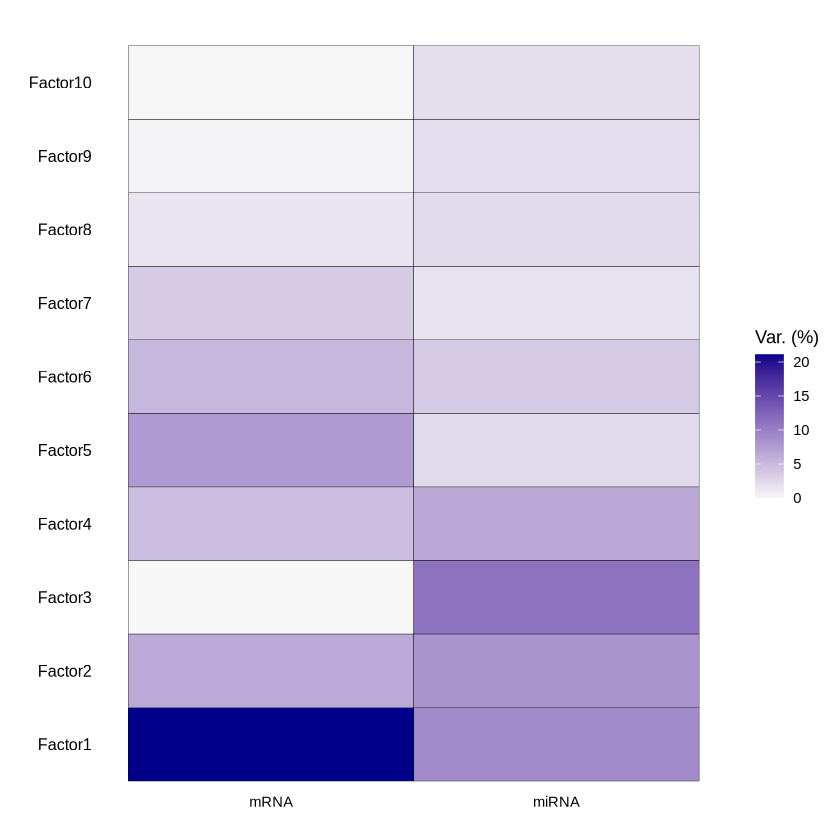

In [15]:
plot_variance_explained(model, x="view", y="factor")

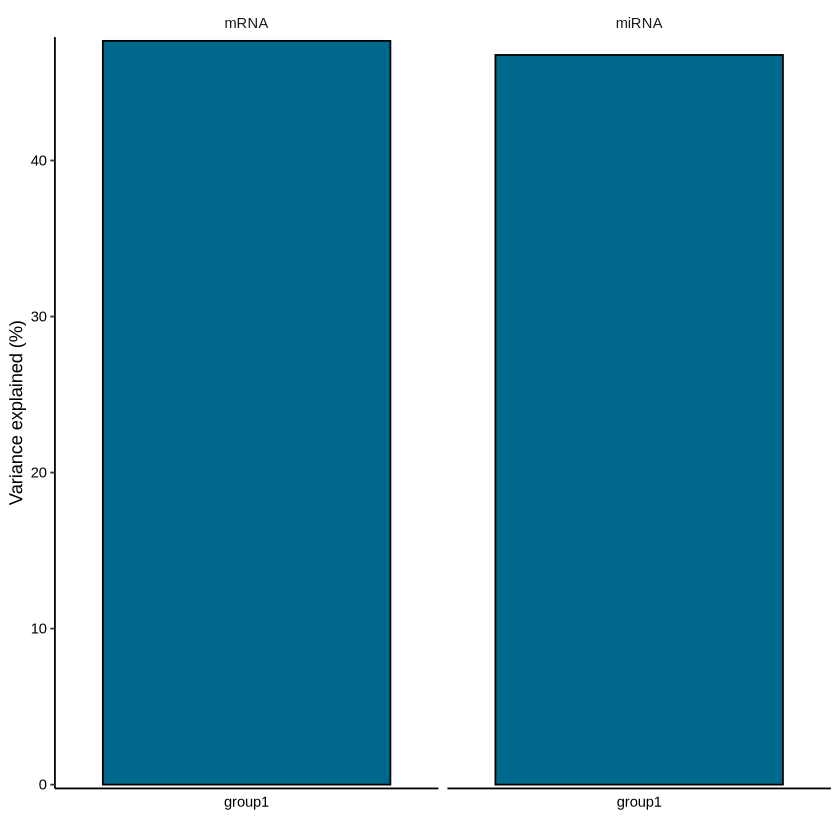

In [16]:
plot_variance_explained(model, x="group", y="factor", plot_total = T)[[2]]

### plot_factor

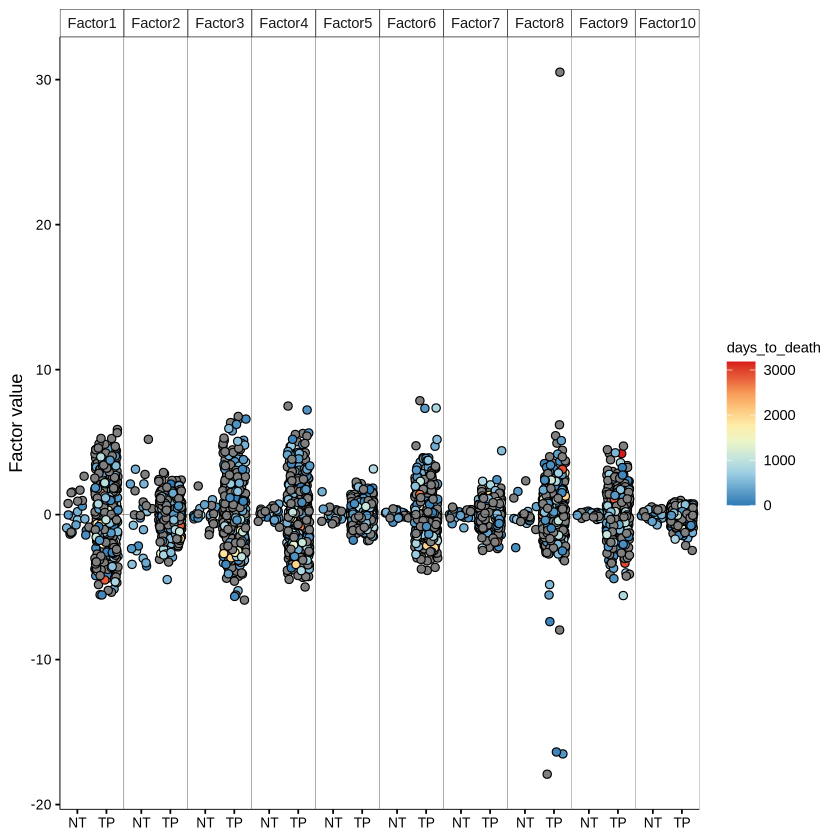

In [8]:
plot_factor(model, factor = 1:10, color_by = "days_to_death")

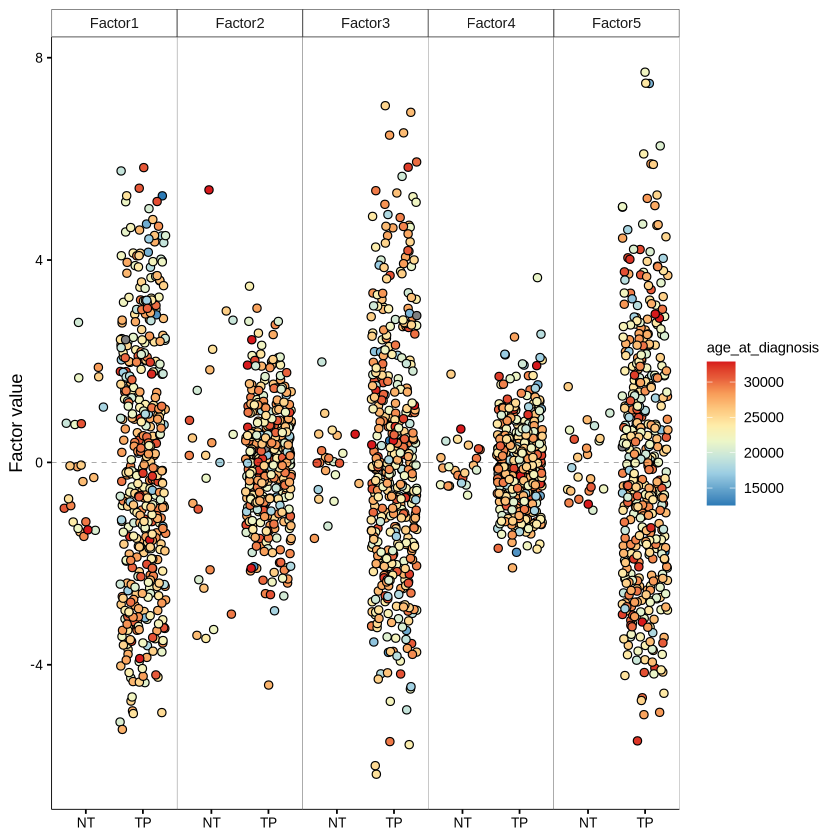

In [14]:
plot_factor(model, factor = 1:5, color_by = "age_at_diagnosis")

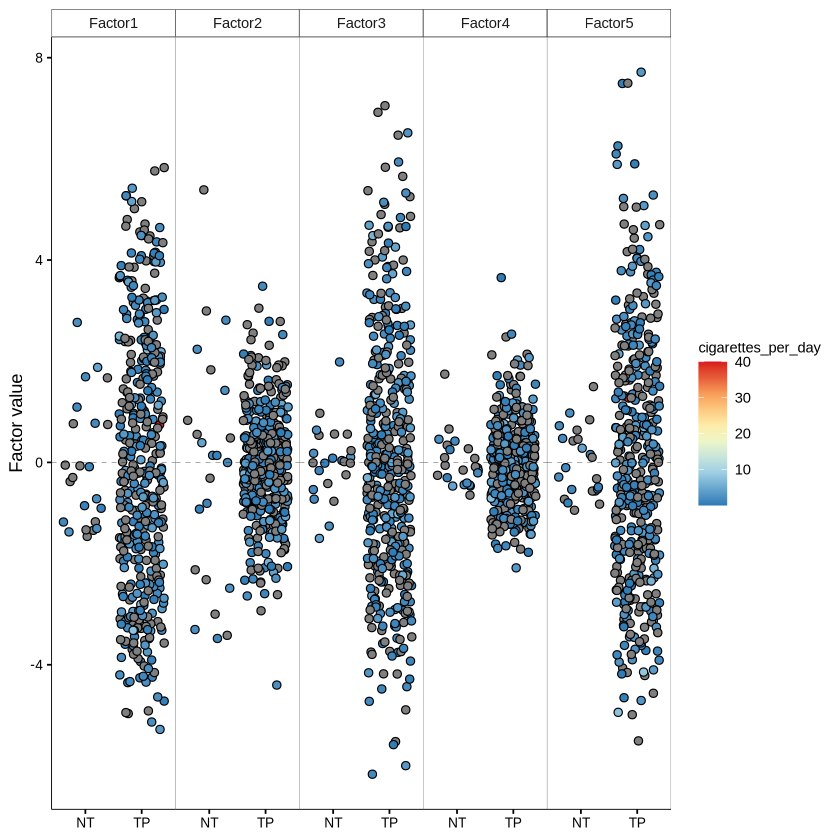

In [15]:
plot_factor(model, factor = 1:5, color_by = "cigarettes_per_day")

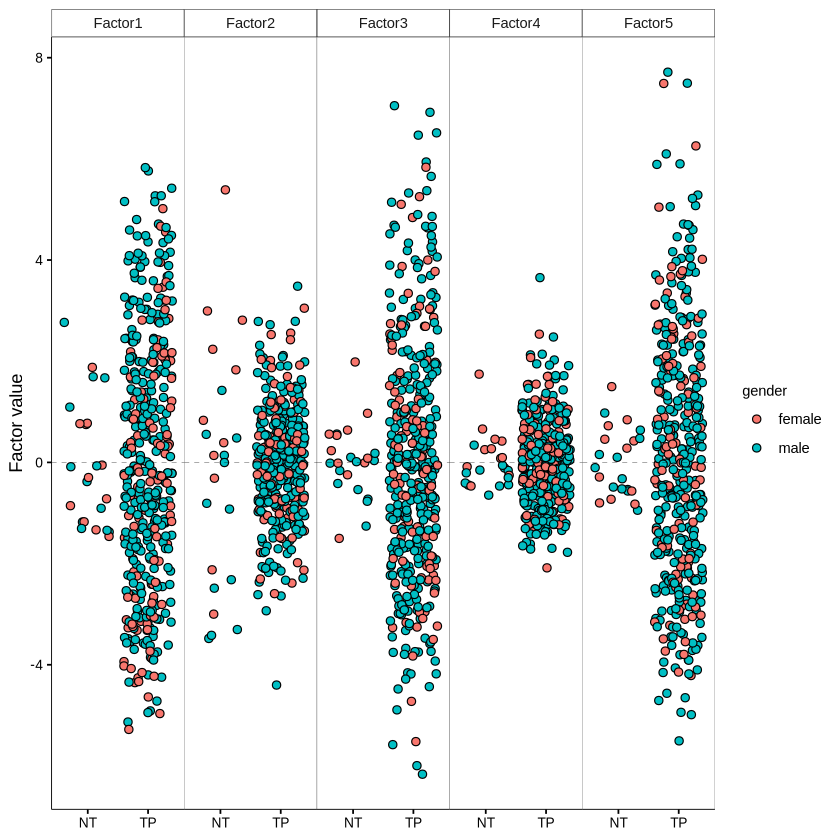

In [16]:
plot_factor(model, factor = 1:5, color_by = "gender")

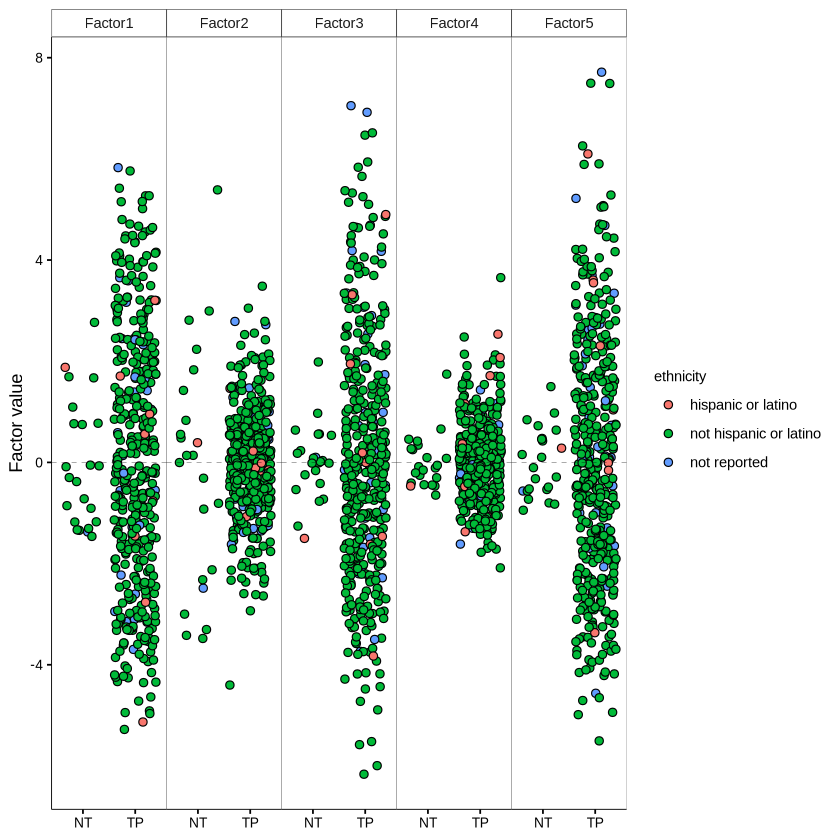

In [17]:
plot_factor(model, factor = 1:5, color_by = "ethnicity")

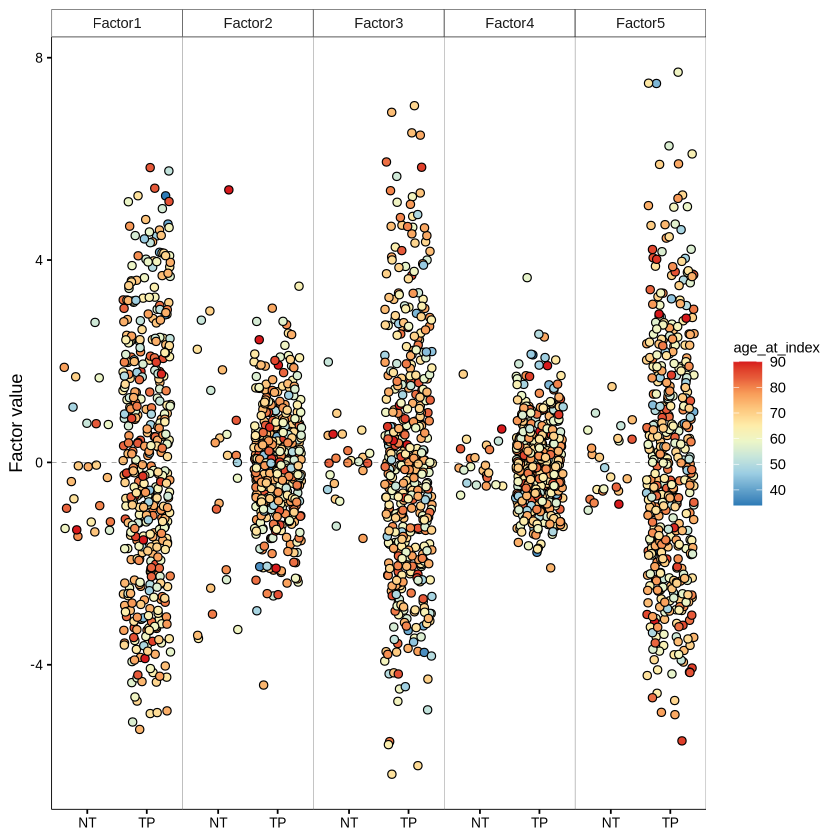

In [18]:
plot_factor(model, factor = 1:5, color_by = "age_at_index")

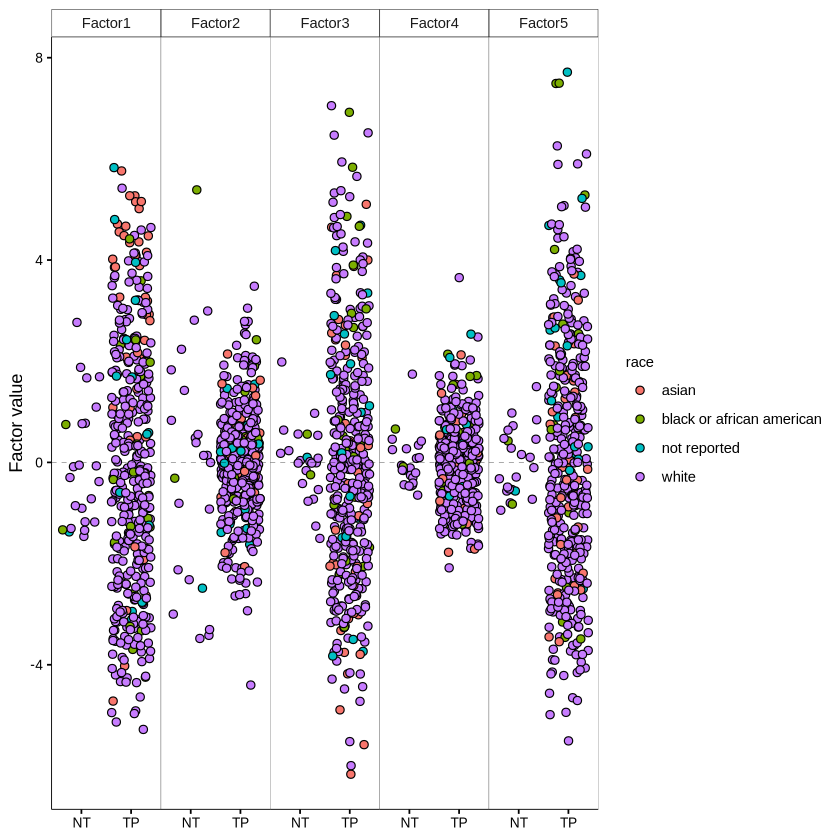

In [19]:
plot_factor(model, factor = 1:5, color_by = "race")

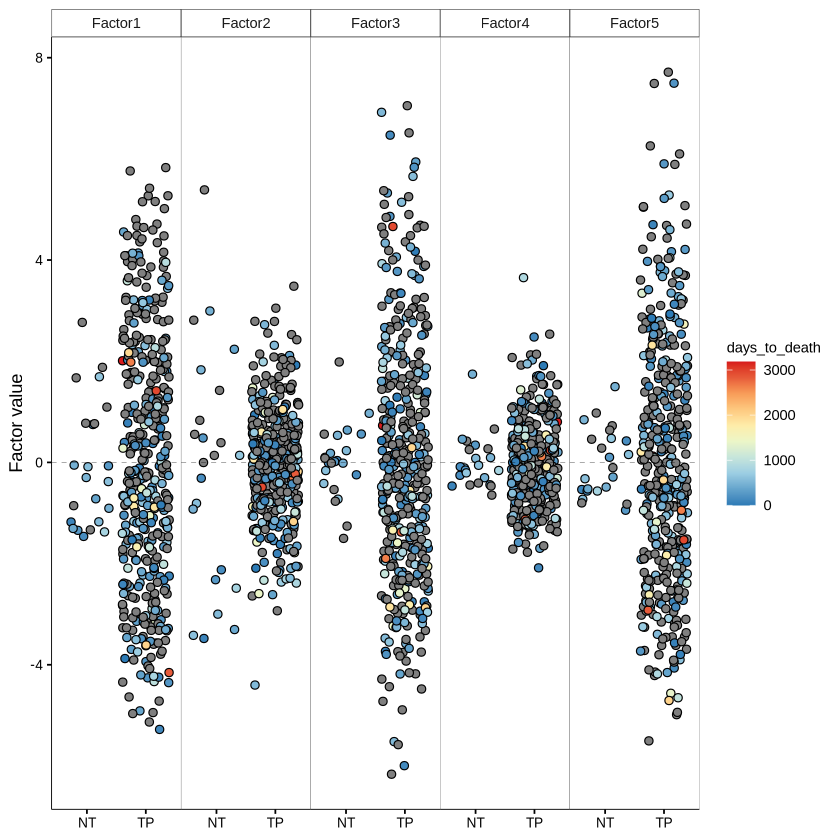

In [20]:
plot_factor(model, factor = 1:5, color_by = "days_to_death")

In [21]:
options(repr.plot.width = 15, repr.plot.height =8) 

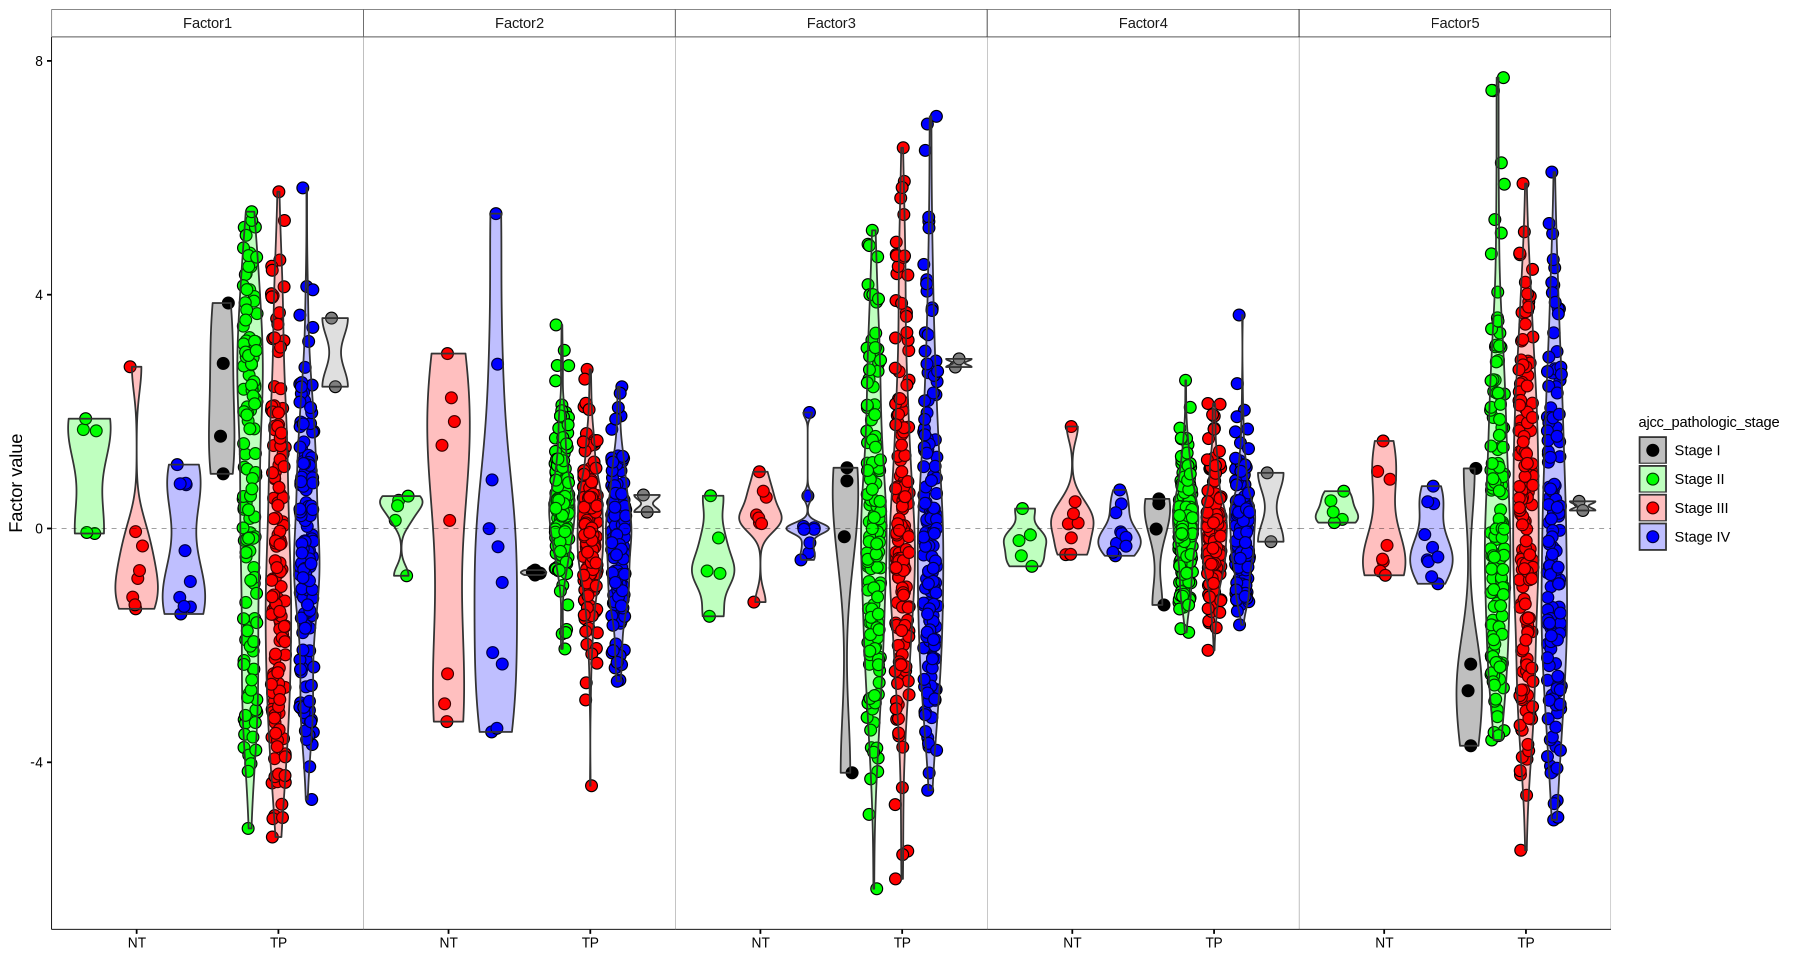

In [22]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "ajcc_pathologic_stage", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("Stage I"="black", "Stage II"="green", "Stage III"="red", "Stage IV"="blue")) +
  scale_fill_manual(values=c("Stage I"="black", "Stage II"="green", "Stage III"="red", "Stage IV"="blue"))

p

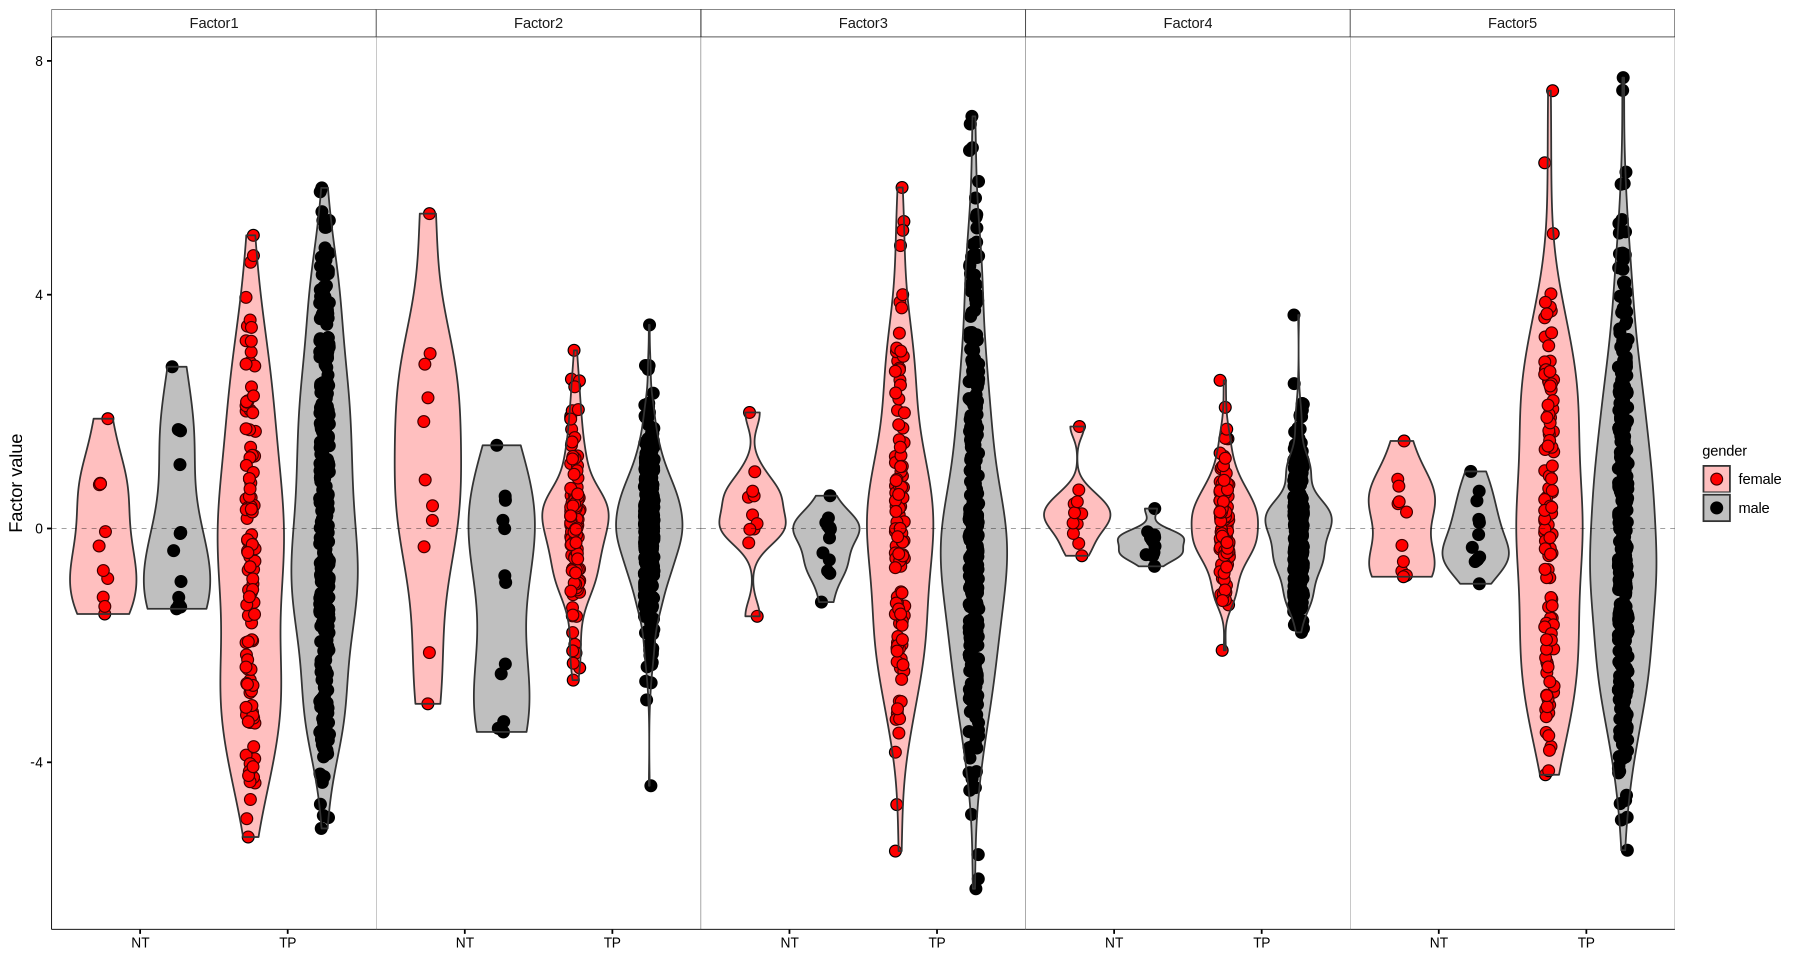

In [23]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "gender", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("male"="black", "female"="red")) +
  scale_fill_manual(values=c("male"="black", "female"="red"))

p

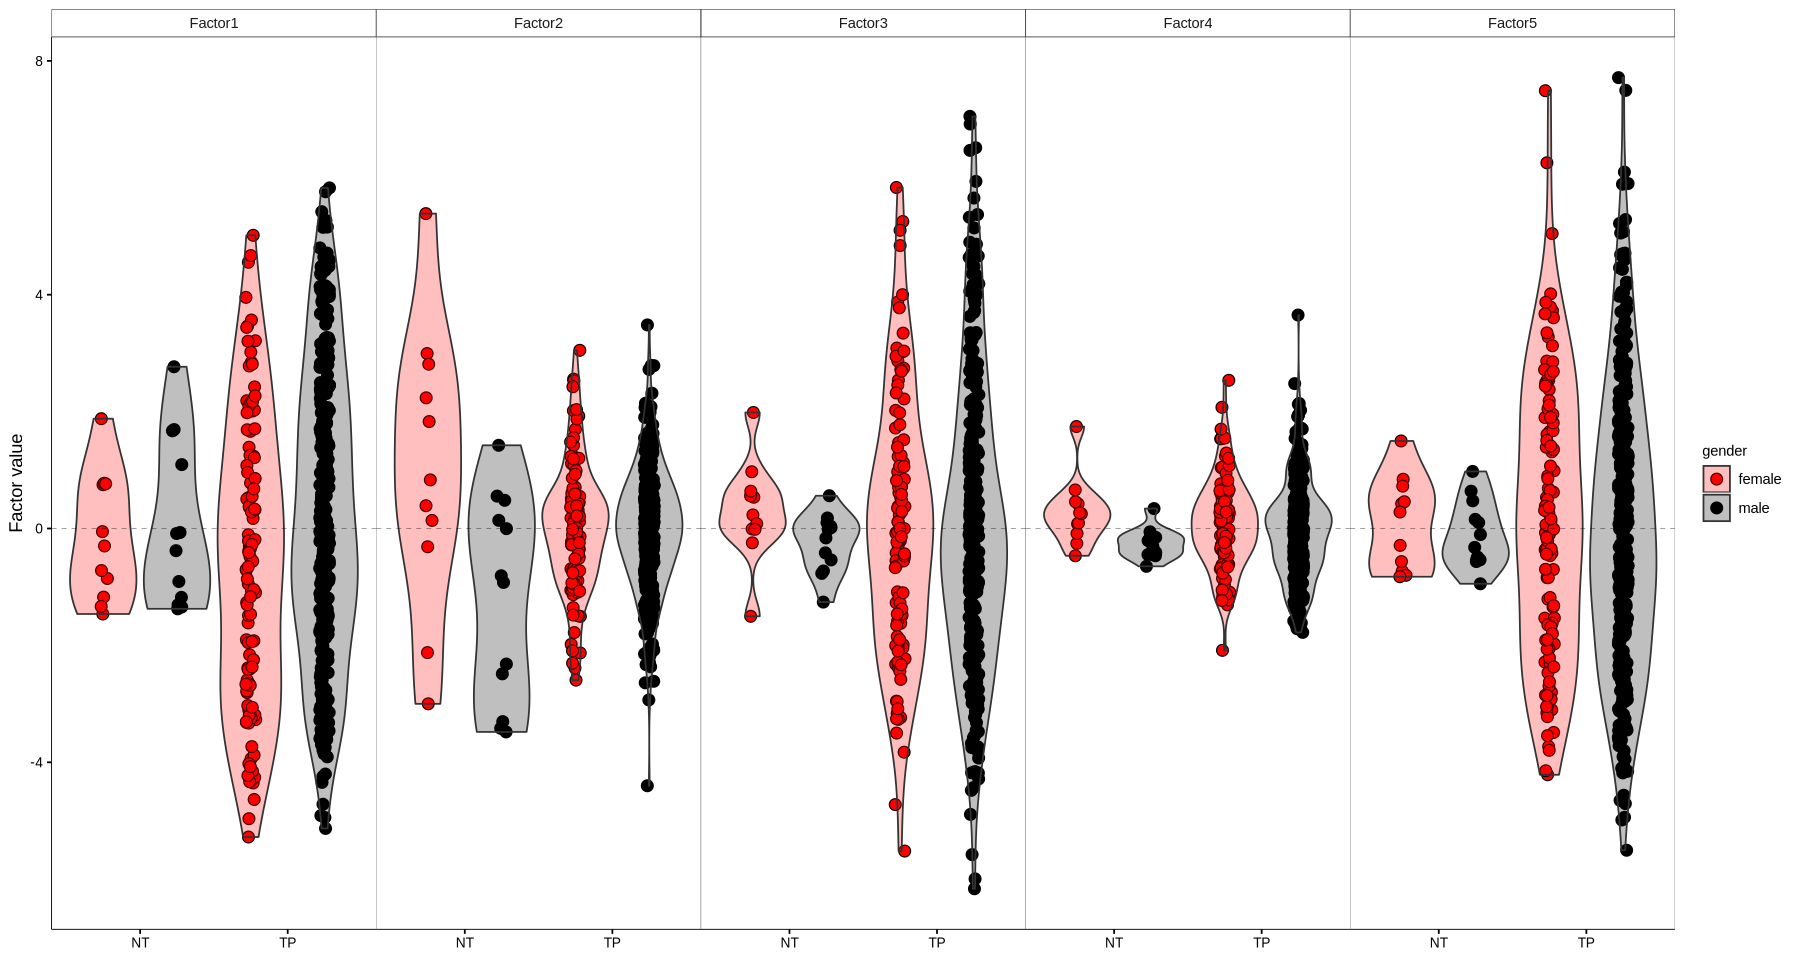

In [24]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "gender", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("male"="black", "female"="red")) +
  scale_fill_manual(values=c("male"="black", "female"="red"))

p

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”


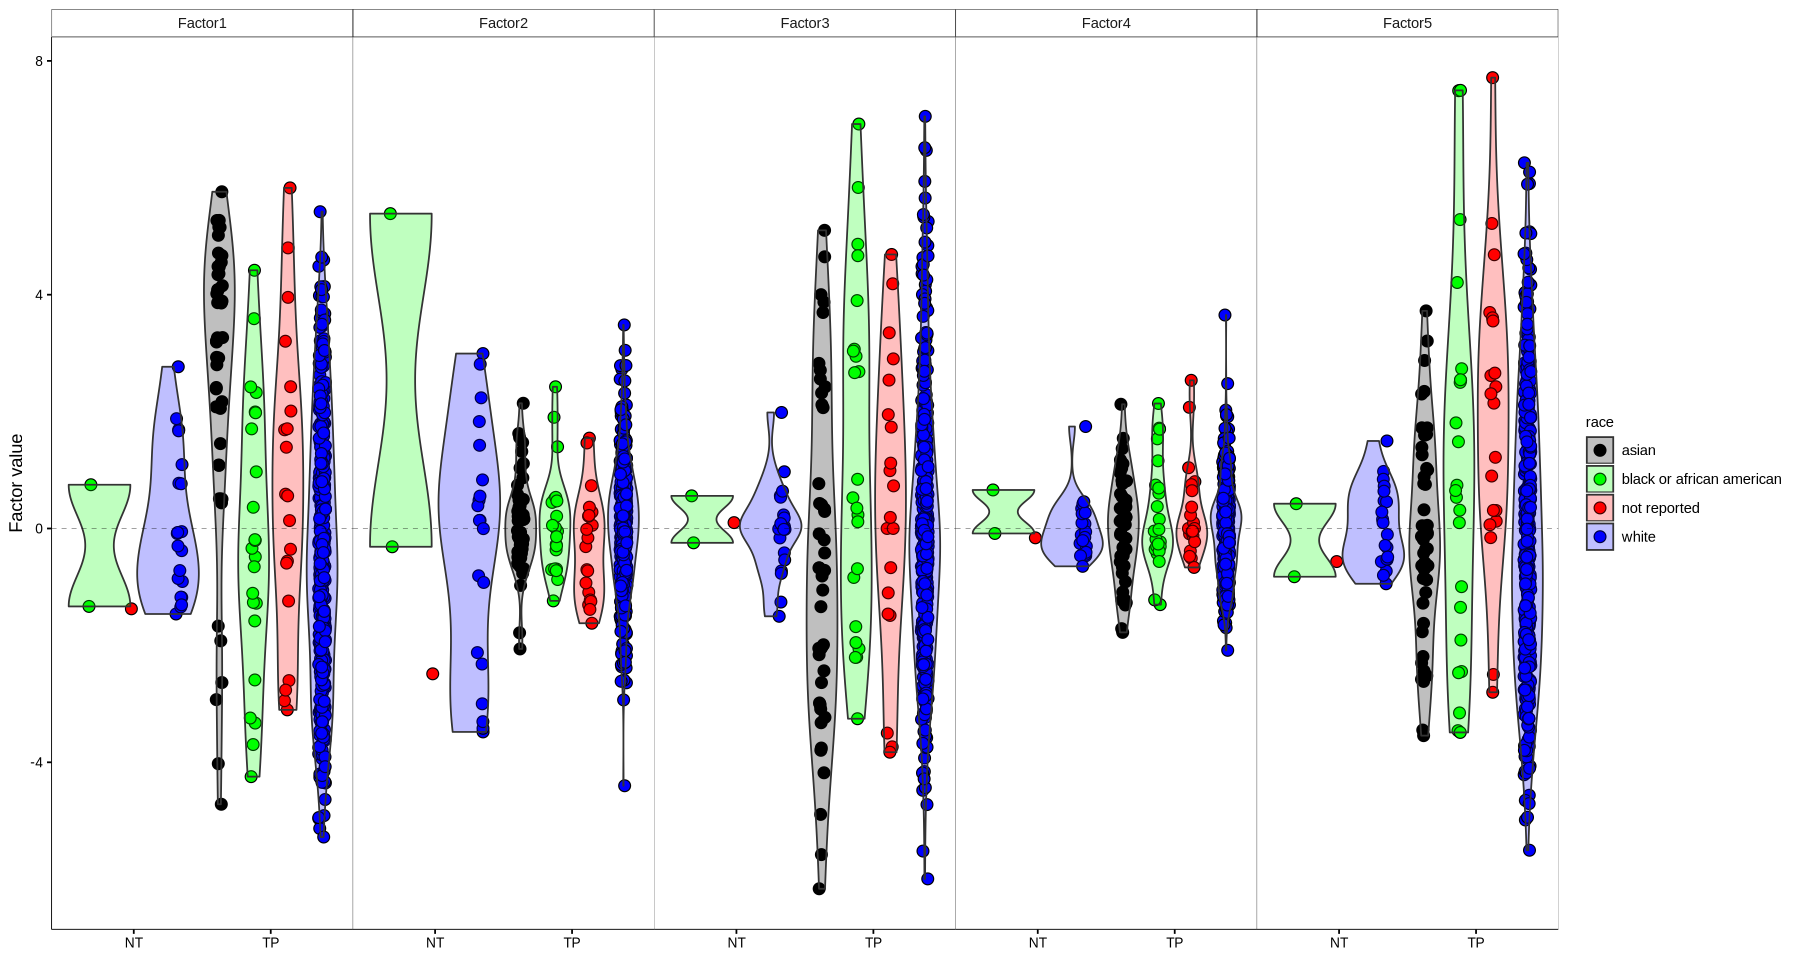

In [25]:
p <- plot_factor(model, factors = c(1,2,3,4,5), color_by = "race", dot_size = 3, dodge = T, legend = T, add_violin = T, violin_alpha = 0.25)

# The output of plot_factor is a ggplot2 object that we can edit
p <- p + 
  scale_color_manual(values=c("asian"="black", "black or african american"="green", "white"="blue", "not reported"="red")) +
  scale_fill_manual(values=c("asian"="black", "black or african american"="green", "white"="blue", "not reported"="red"))

p

### plot_factors

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



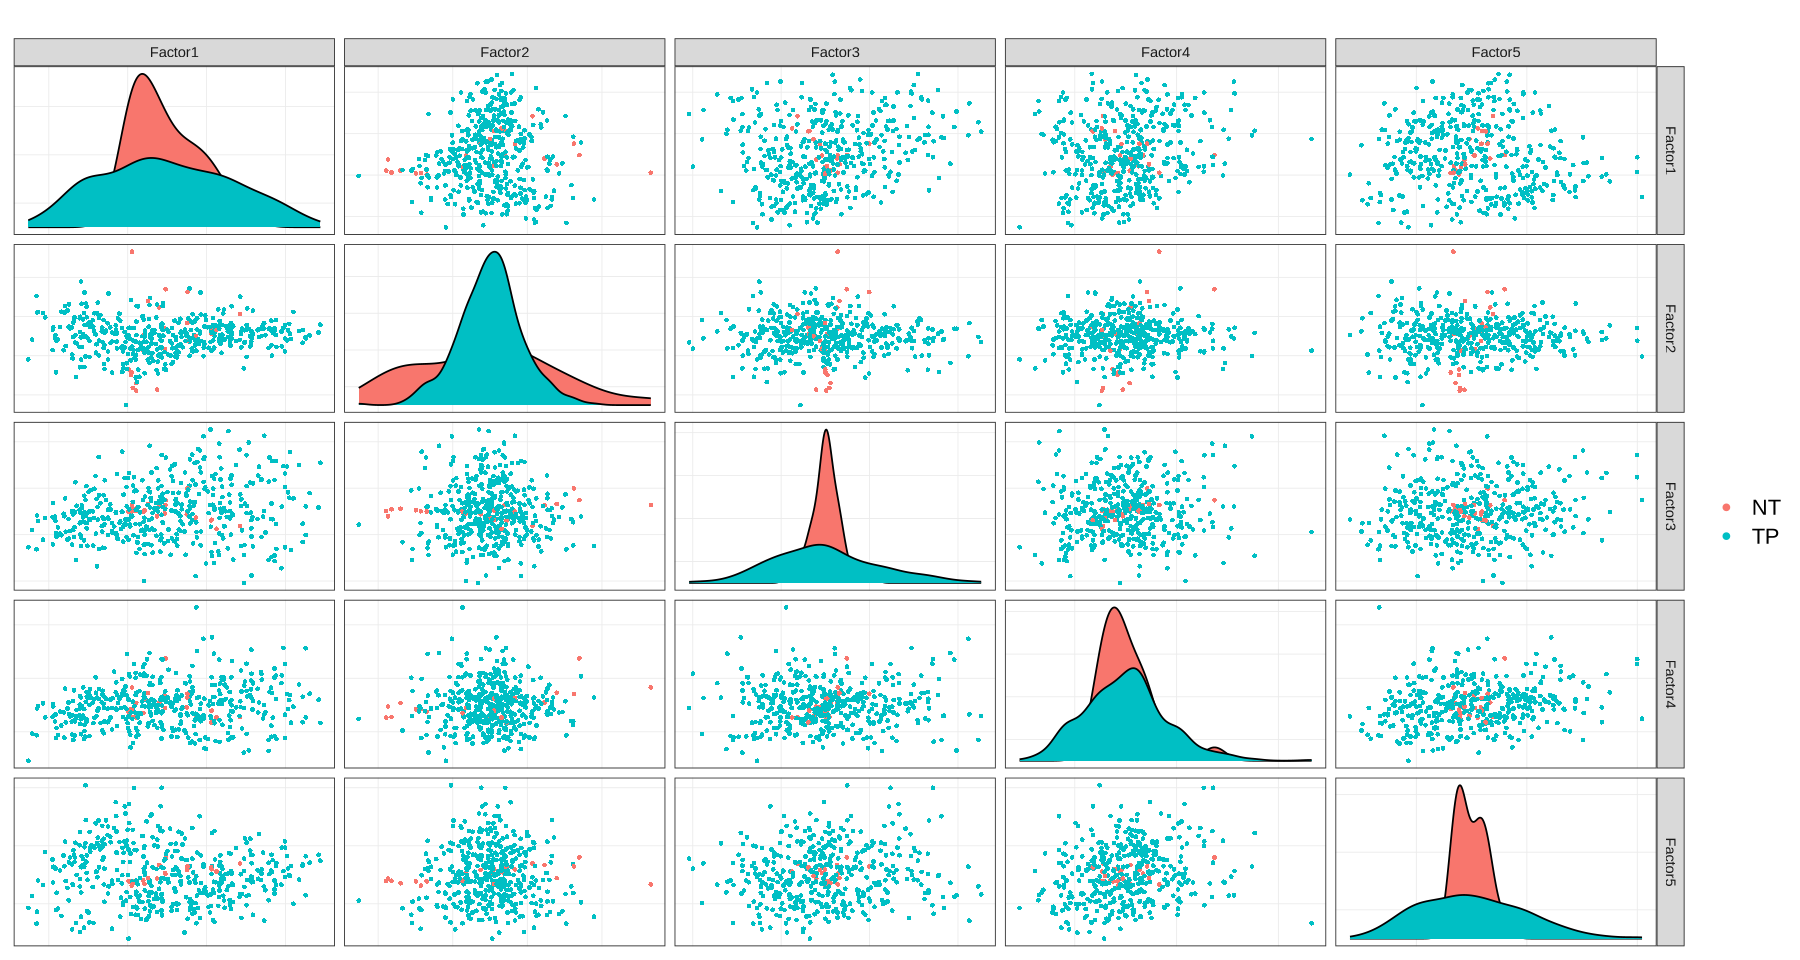

In [26]:
# Generate the plot and store it in a variable
p <- plot_factors(model, factors = 1:5, color_by = "group")

p

### correlate_factors_with_covariates

Warning message in correlate_factors_with_covariates(model, covariates = c("ajcc_pathologic_stage", :
“There are non-numeric values in the covariates data.frame, converting to numeric...”


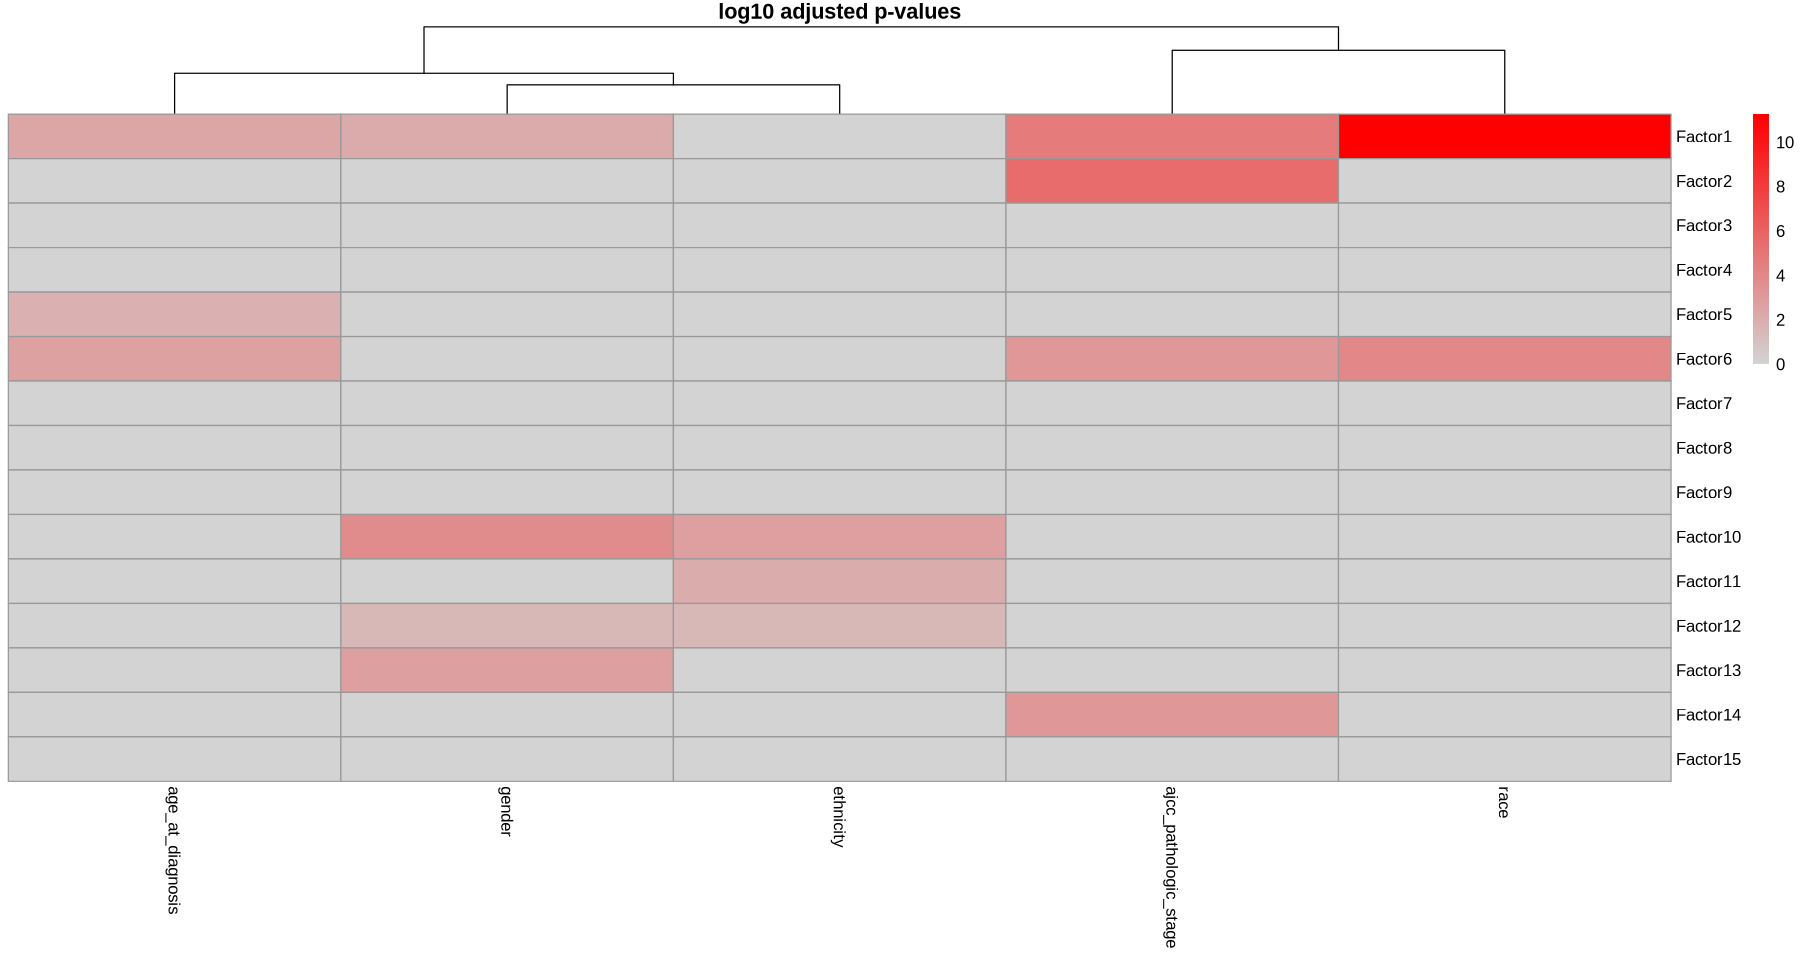

In [28]:
correlate_factors_with_covariates(model, covariates = c("ajcc_pathologic_stage", "gender", "ethnicity", "race", "age_at_diagnosis"), plot="log_pval")